TRIPLETEN - DATA ANALYSIS BOOTCAMP
SPRINT 6

Descrição do projeto
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

# 1. Carregando os dados

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

data = pd.read_csv('games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2. Realizando correções e enriquecendo os dados

## 2.2. Alterando os nomes das colunas

In [2]:
# Passando os nomes das colunas para letras minúsculas
new_col_names = [] # nova lista vazia para agregar os novos nomes

for old_name in data.columns:
    new_name = old_name.lower() # passando nome da coluna para minúscula
    new_col_names.append(new_name) # adicionando à lista

data.columns = new_col_names # reatribuindo

data.columns # visualizando

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.3. Avaliando duplicados e ausentes

In [3]:
# Avaliando linhas duplicadas
print(data.duplicated().sum(), 'linhas duplicadas no dataframe')


0 linhas duplicadas no dataframe


In [4]:
# Visualizando ausentes
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


### Realizando Correções

#### Dados de `name`

In [5]:
# Tratando os ausentes em 'name'
data = data.dropna(subset='name')


Estas duas linhas podem ser excluídas, pois nelas faltam muitos dados e o impacto da exclusão é insignificante

#### Dados de `year_of_release`

Temos 269 linhas com 'ano' ausente.
Vamos buscar formas e assumir suposições e aproximações sobre ano de lançamento de alguns jogos de forma a evitar que esses dados sejam descartados.

Para lançamentos de jogos com o mesmo nome, vou usar a mediana entre os anos, onde o valor do ano esteja disponível.

In [6]:
# Usando a mediana dos anos onde esses valores são não ausentes

# Substituindo os valores NaN em 'year_of_release' pela mediana
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(['name'])['year_of_release'].transform('median'))
print(data.isna().sum())


name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


Ainda sobraram 146 linhas onde `year_of_release` está ausente.
Decidi descartar estas linhas pois não encontrei uma forma de 

In [7]:
data = data.dropna(subset='year_of_release') # removendo linhas com dados ausentes
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64


Finalmente, convertendo os dados para `int`:

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#### Dados de `critic_score`, `user_score` e `rating`

<b>Valores ausentes</b>

Os valores nas colunas de score provavelmente estão ausentes por esses jogos não terem sido avaliados.

Os valores de `rating` estão ausentes provavelmente porque o rating desses jogos não foi definido.

Por estes motivos, vamos manter os dados ausentes nestas colunas como estão, sem nenhum preenchimento ou exclusão.

O preenchimento destas colunas poderia impactar nos resultados da análise.

<b>Valores `tbd` na coluna `user_score`:</b>

O termo `tbd` provavelmente significa To Be Determined. Decidi substituir os valores `tbd` por NaN, pois é um volume muito grande de dados e não devem ser excluídos.

Também por ser uma quantidade significativa, não vou substituir por um valor arbitrário pois isso poderia influenciar no resultado da análise. 

In [9]:
# Visualizando os valores `tbd`
print(data['user_score'].value_counts().sort_index(ascending=False))

user_score
tbd    2394
9.7       1
9.6       2
9.5       5
9.4      11
       ... 
0.6       2
0.5       2
0.3       2
0.2       2
0         1
Name: count, Length: 96, dtype: int64


In [10]:
# Alterando tipos de dados de 'user_score'
data['user_score'] = data['user_score'].replace('tbd', np.nan)

data['user_score'] = data['user_score'].astype('float')

# Visualizando as substituições
print(data['user_score'].value_counts(dropna=False).sort_index(ascending=False))

user_score
9.7       1
9.6       2
9.5       5
9.4      11
9.3      31
       ... 
0.5       2
0.3       2
0.2       2
0.0       1
NaN    9027
Name: count, Length: 96, dtype: int64


In [11]:
data['critic_score'] = data['critic_score'].astype('float')

## 2.4. Enriquecendo os dados
Criando uma nova coluna com o total de vendas (somando as quatro colunas com dados de vendas)

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# 3. Analisando os dados
Vamos buscar respostas para as seguintes perguntas:

1. Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?
2. Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
3. Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.

4. Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.
5. Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.
6. Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
7. Com essas conclusões em mente, compare as vendas em outras plataformas.
8. Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

## 3.1. Jogos lançados em anos diferentes
1. Veja quantos jogos foram lançados em anos diferentes. Os dados de cada período são significativos?

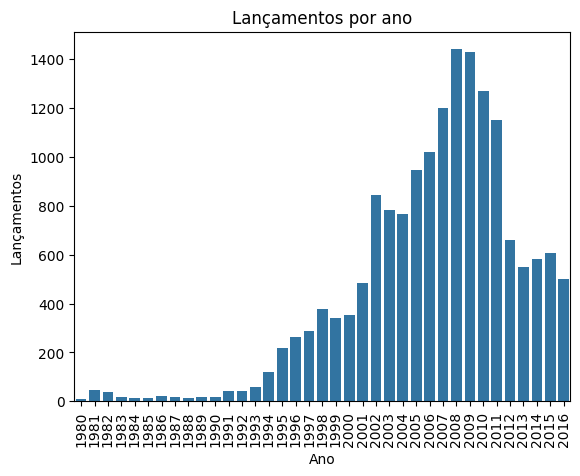

In [13]:
# Avaliando a quantidade de jogos lançados por ano
releases_by_year = data.groupby('year_of_release').agg({'name':'count'})
releases_by_year = releases_by_year.sort_values(by='year_of_release', ascending=True)
releases_by_year = releases_by_year.rename(columns={'name':'releases'})

# Criando um gráfico de barras
ax = sns.barplot(data=releases_by_year,
            x='year_of_release',
            y='releases',
            # ci=None
           );

plt.xticks(rotation=90) # Rotacionando os labels

# # Definindo nomes dos eixos e título
ax.set_xlabel('Ano')
ax.set_ylabel('Lançamentos')
ax.set_title('Lançamentos por ano')

plt.show();

A quantidade de jogos lançados passou por diferentes fases ao longo do tempo.

De 1980 a 1992 havia uma quantidade relativamente baixa de lançamentos.

De 1993 a 2000 houve um aumento gradual, chegando perto dos 400 anuais.

De 2001 a 2011 um novo movimento de aumento, dessa vez muito mais forte, chegando ao récorde histórico em 2008, com 1441 jogos lançados.

De 2012 a 2016 as quantidades foram bem menores do que na primeira década dos anos 2000, caindo para menos da metade do volume de 2008. As quantidades se mantiveram em uma faixa similar até 2016.

## 3.2. Plataformas mais vendidas e ciclo de vida das plataformas

Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

### Volume financeiro de vendas
Vamos avaliar as plataformas que tiveram os maiores faturamentos em vendas de jogos.

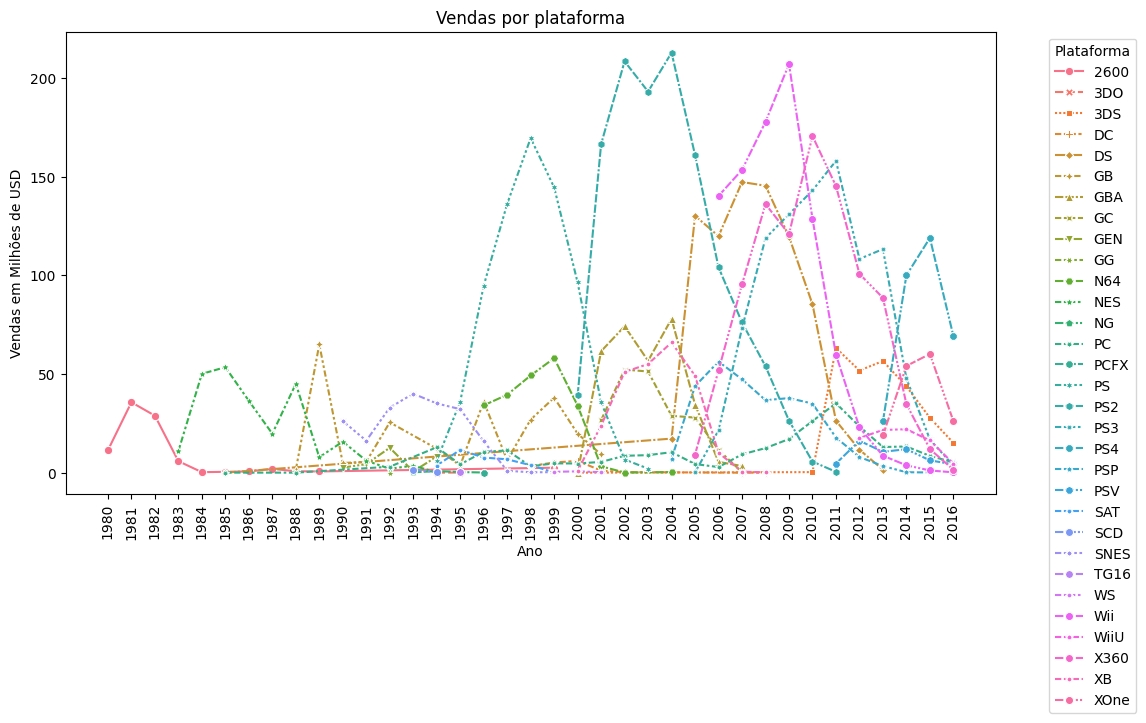

In [14]:
# Agrupando os dados por plataforma e por ano e gerando um gráfico para visualizar as vendas de todas as plataformas ao longo do tempo
sales_by_plat = data.groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()

# Criando um gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=sales_by_plat,
            x='year_of_release',
            y='total_sales',
            hue='platform',
            style='platform',
            markers=True,
            markersize=6
            # ci=None
           );

# Ajustando o eixo 'x'
unique_years = sales_by_plat['year_of_release'].unique() # Define os ticks do eixo x para todos os anos únicos
ax.set_xticks(unique_years)  
plt.xticks(rotation=90) # Rotacionando os labels

# # Definindo nomes dos eixos e título
ax.set_xlabel('Ano')
ax.set_ylabel('Vendas em Milhões de USD')
ax.set_title('Vendas por plataforma')

# Adicionar a legenda fora da área do gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

Vamos filtrar os dados para avaliar apenas as plataformas com maiores volumes de vendas

Entre as 31 plataformas, 16 delas tiveram vendas maiores que 200 milhões de USD.


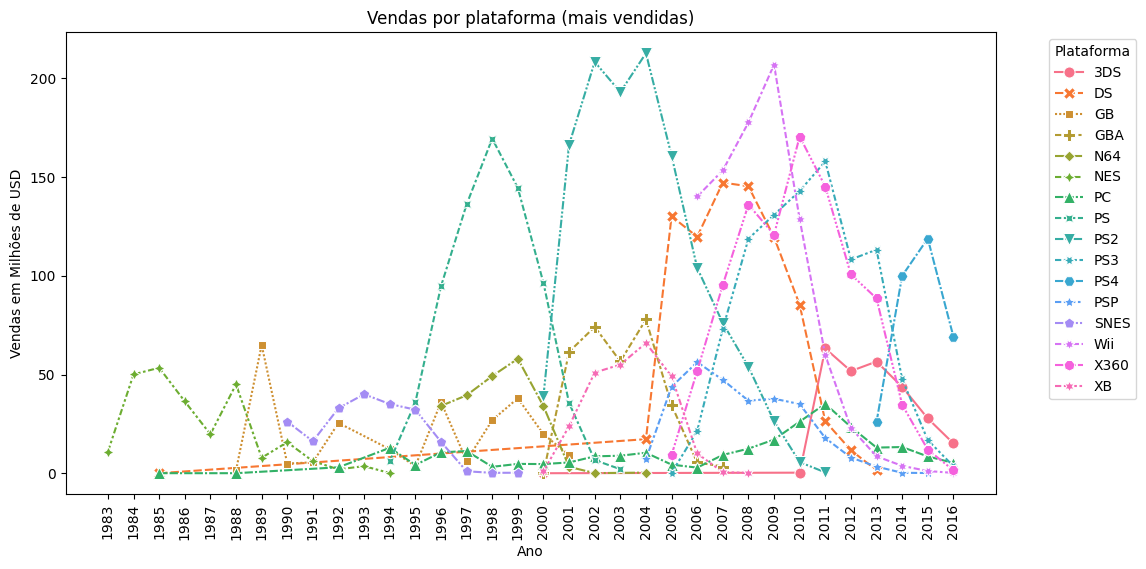

In [15]:
# Definindo um filtro para as plataformas mais vendidas
# Definindo o limite em milhões de USD
top_sellers_limit = 200 
from_year = 1900
to_year = 2016
# Agrupando por plataformas e somando o total de vendas
top_sellers = data.groupby(['platform'])['total_sales'].agg('sum').sort_values(ascending=False) 
# Filtrando apenas vendas acima do limite definido em 'top_sellers_limit', e extraindo os nomes em uma lista
top_sellers_list = (top_sellers[top_sellers > top_sellers_limit]).index

# Exibindo o total de plataformas e o limite utilizado
unique_platforms = len(data['platform'].unique()) # total de plataformas de todo o dataset
print(f'Entre as {unique_platforms} plataformas, {len(top_sellers_list)} delas tiveram vendas maiores que {top_sellers_limit} milhões de USD.')

# Filtrando os dataframe original apenas com as plataformas com maiores vendas
# data_top_sellers = data[data['platform'].isin(top_sellers_list)].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()
data_top_sellers = data[
    (data['platform'].isin(top_sellers_list)) & # filtrando para que esteja na lista de top mais vendidas
    (data['year_of_release'] >= from_year) & # filtrando ano mínimo
    (data['year_of_release'] <= to_year) # filtrando ano máximo
    ].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index() # agrupando

# Criando um gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data_top_sellers,
            x='year_of_release',
            y='total_sales',
            hue='platform',
            # linewidth=2.5,
            style='platform',
            markers=True,
            markersize=8
            # ci=None
           );

# Ajustando o eixo 'x'
unique_years = data_top_sellers['year_of_release'].unique() # Define os ticks do eixo x para todos os anos únicos
ax.set_xticks(unique_years)  
plt.xticks(rotation=90) # Rotacionando os labels

# # Definindo nomes dos eixos e título
ax.set_xlabel('Ano')
ax.set_ylabel('Vendas em Milhões de USD')
ax.set_title('Vendas por plataforma (mais vendidas)')

# Adicionar a legenda fora da área do gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

A partir da visualização geral, podemos avaliar os dados focando em três períodos diferentes, onde parecem ter ocorrido alguns ciclos distintos:

- Até 1994

- De 1994 a 2004

- De 2004 a 2017

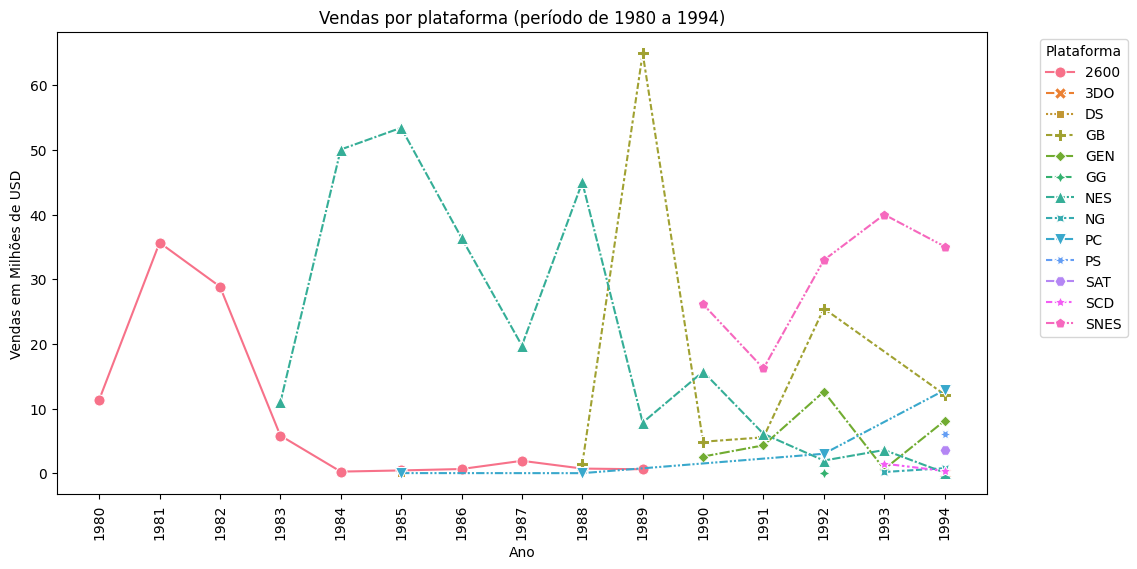

In [16]:
# Definindo um filtro para as plataformas mais vendidas
# Definindo o limite em milhões de USD
top_sellers_limit = 0 
from_year = 1980
to_year = 1994
# Agrupando por plataformas e somando o total de vendas
top_sellers = data.groupby(['platform'])['total_sales'].agg('sum').sort_values(ascending=False) 
# Filtrando apenas vendas acima do limite definido em 'top_sellers_limit', e extraindo os nomes em uma lista
top_sellers_list = (top_sellers[top_sellers > top_sellers_limit]).index

# Exibindo o total de plataformas e o limite utilizado
# unique_platforms = len(data['platform'].unique()) # total de plataformas de todo o dataset
# print(f'Entre as {unique_platforms} plataformas, {len(top_sellers_list)} delas tiveram vendas maiores que {top_sellers_limit} milhões de USD.')

# Filtrando os dataframe original apenas com as plataformas com maiores vendas
# data_top_sellers = data[data['platform'].isin(top_sellers_list)].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()
data_top_sellers_p1 = data[
    (data['platform'].isin(top_sellers_list)) & # filtrando para que esteja na lista de top mais vendidas
    (data['year_of_release'] >= from_year) & # filtrando ano mínimo
    (data['year_of_release'] <= to_year) # filtrando ano máximo
    ].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index() # agrupando

# Criando um gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data_top_sellers_p1,
            x='year_of_release',
            y='total_sales',
            hue='platform',
            # linewidth=2.5,
            style='platform',
            markers=True,
            markersize=8
            # ci=None
           );

# Ajustando o eixo 'x'
unique_years = data_top_sellers_p1['year_of_release'].unique() # Define os ticks do eixo x para todos os anos únicos
ax.set_xticks(unique_years)  
plt.xticks(rotation=90) # Rotacionando os labels

# # Definindo nomes dos eixos e título
ax.set_xlabel('Ano')
ax.set_ylabel('Vendas em Milhões de USD')
ax.set_title(f'Vendas por plataforma (período de {from_year} a {to_year})')

# Adicionar a legenda fora da área do gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

Entre 1980 e 1994, notamos:
- Pouca diversidade de plataformas
- Baixa quantidade de vendas
- Plataforma 2600 sendo a única até 1984
- NES começa a se destacar e segue bem até 1988
- GB tem um grande volume de vendas em 1989
- 1990 em diante, começa o surgimento de novas plataformas, se destacando a SNES

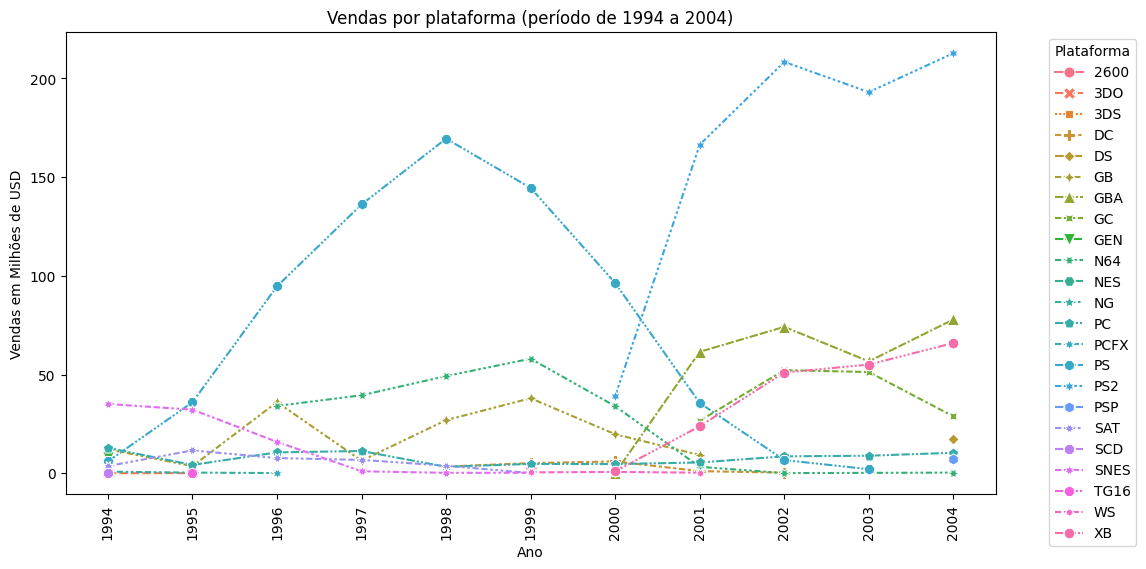

In [17]:
# Definindo um filtro para as plataformas mais vendidas
# Definindo o limite em milhões de USD
top_sellers_limit = 0 
from_year = 1994
to_year = 2004
# Agrupando por plataformas e somando o total de vendas
top_sellers = data.groupby(['platform'])['total_sales'].agg('sum').sort_values(ascending=False) 
# Filtrando apenas vendas acima do limite definido em 'top_sellers_limit', e extraindo os nomes em uma lista
top_sellers_list = (top_sellers[top_sellers > top_sellers_limit]).index

# # Exibindo o total de plataformas e o limite utilizado
# unique_platforms = len(data['platform'].unique()) # total de plataformas de todo o dataset
# print(f'Entre as {unique_platforms} plataformas, {len(top_sellers_list)} delas tiveram vendas maiores que {top_sellers_limit} milhões de USD.')

# Filtrando os dataframe original apenas com as plataformas com maiores vendas
# data_top_sellers = data[data['platform'].isin(top_sellers_list)].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()
data_top_sellers_p2 = data[
    (data['platform'].isin(top_sellers_list)) & # filtrando para que esteja na lista de top mais vendidas
    (data['year_of_release'] >= from_year) & # filtrando ano mínimo
    (data['year_of_release'] <= to_year) # filtrando ano máximo
    ].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index() # agrupando

# Criando um gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data_top_sellers_p2,
            x='year_of_release',
            y='total_sales',
            hue='platform',
            # linewidth=2.5,
            style='platform',
            markers=True,
            markersize=8
            # ci=None
           );

# Ajustando o eixo 'x'
unique_years = data_top_sellers_p2['year_of_release'].unique() # Define os ticks do eixo x para todos os anos únicos
ax.set_xticks(unique_years)  
plt.xticks(rotation=90) # Rotacionando os labels

# # Definindo nomes dos eixos e título
ax.set_xlabel('Ano')
ax.set_ylabel('Vendas em Milhões de USD')
ax.set_title(f'Vendas por plataforma (período de {from_year} a {to_year})')

# Adicionar a legenda fora da área do gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

Entre 1994 e 2004:

- Em 1995 o PS se torna a plataforma com mais vendas, e segue em uma expansão muito expressiva por vários anos, sendo recorde de vendas.
- Ao redor de 2000 novas plataformas surgem. PS2 toma o lugar do PS em 2001, e bate novos recordes.
- PS se mantém de longe a plataforma com mais jogos vendidos de 2001 a 2004, mas novas começam a surgir e aumentar mostram bons volumes de vendas, como GBA, 2600 e GC.

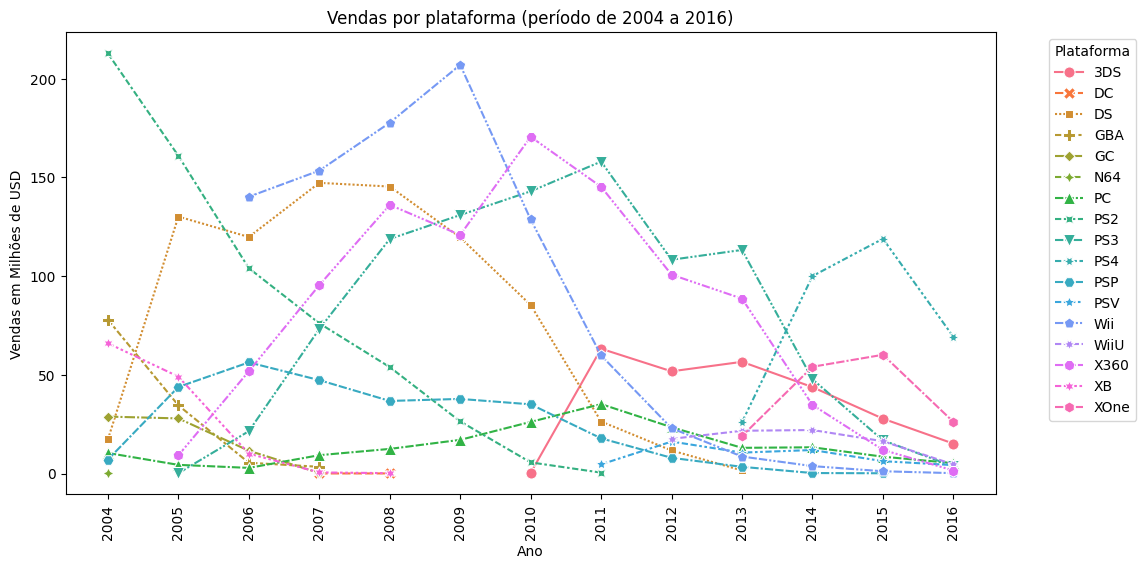

In [18]:
# Definindo um filtro para as plataformas mais vendidas
# Definindo o limite em milhões de USD
top_sellers_limit = 0 
from_year = 2004
to_year = 2016
# Agrupando por plataformas e somando o total de vendas
top_sellers = data.groupby(['platform'])['total_sales'].agg('sum').sort_values(ascending=False) 
# Filtrando apenas vendas acima do limite definido em 'top_sellers_limit', e extraindo os nomes em uma lista
top_sellers_list = (top_sellers[top_sellers > top_sellers_limit]).index

# # Exibindo o total de plataformas e o limite utilizado
# unique_platforms = len(data['platform'].unique()) # total de plataformas de todo o dataset
# print(f'Entre as {unique_platforms} plataformas, {len(top_sellers_list)} delas tiveram vendas maiores que {top_sellers_limit} milhões de USD.')

# Filtrando os dataframe original apenas com as plataformas com maiores vendas
# data_top_sellers = data[data['platform'].isin(top_sellers_list)].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()
data_top_sellers_p3 = data[
    (data['platform'].isin(top_sellers_list)) & # filtrando para que esteja na lista de top mais vendidas
    (data['year_of_release'] >= from_year) & # filtrando ano mínimo
    (data['year_of_release'] <= to_year) # filtrando ano máximo
    ].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index() # agrupando

# Criando um gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data_top_sellers_p3,
            x='year_of_release',
            y='total_sales',
            hue='platform',
            # linewidth=2.5,
            style='platform',
            markers=True,
            markersize=8
            # ci=None
           );

# Ajustando o eixo 'x'
unique_years = data_top_sellers_p3['year_of_release'].unique() # Define os ticks do eixo x para todos os anos únicos
ax.set_xticks(unique_years)  
plt.xticks(rotation=90) # Rotacionando os labels

# # Definindo nomes dos eixos e título
ax.set_xlabel('Ano')
ax.set_ylabel('Vendas em Milhões de USD')
ax.set_title(f'Vendas por plataforma (período de {from_year} a {to_year})')

# Adicionar a legenda fora da área do gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

De 2004 a 2016:
- Se reduz a hegemonia da linha PS2, e ambos PS3 e PS4 passam por momentos de mercado com alta competição e variedade.
- O DS passa por um ciclo de sucesso de 2005 a 2010
- Wii inicia vendas em 2006 e tem muito sucesso, sendo líder por alguns anos, mas seguido de perto por DS, X360 e PS3
- De 2010 a 2013 os grandes players são PS3 em primeiro e X360 em segundo
- Em 2014 o PS4 toma a liderança, com cerca de 100 Mi USD mas as quantidades de vendas já não são as mesmas que que primeira década dos 2000s.
- De 2014 a 2016 o PS4 é o líder, seguido por XB e XOne e as demais plataformas com volumes menores.

### Tempo de vida
Vamos avaliar qual foi o tempo de vida das plataformas que já não vendem jogos, bem como das que seguem com vendas.

In [19]:
# Extraindo do dataset principal os dados de ano mínimo e máximo de cada plataforma
first_years = pd.DataFrame(data.groupby('platform')['year_of_release'].min()).rename(columns={'year_of_release':'min_year'}).reset_index()
last_years = pd.DataFrame(data.groupby('platform')['year_of_release'].max()).rename(columns={'year_of_release':'max_year'}).reset_index()
# Unindo os dois dados
platform_lifespans = last_years.merge(first_years, on='platform')
# Adicionando uma nova coluna com o tmepo de vida (máximo menos mínimo)
platform_lifespans['lifespan'] = platform_lifespans['max_year'] - platform_lifespans['min_year']

# Eliminando a linha da plataforma PC, já que ela não se encaixa nessa análise de lifespan
platform_lifespans = platform_lifespans[~(platform_lifespans['platform'] == 'PC')]

# Ordenando por maiores 'lifespan' e imprimindo
print(platform_lifespans.sort_values(ascending=False, by='lifespan'))
print()
print(round(platform_lifespans[platform_lifespans['max_year'] != 2016]['lifespan'].mean(), 2), 'é a vida média das plataformas que já não vendem mais jogos em 2016.')
print()
print(round(platform_lifespans[platform_lifespans['max_year'] == 2016]['lifespan'].mean(), 2), 'é a vida média das plataformas que seguem vendendo jogos em 2016.')


   platform  max_year  min_year  lifespan
4        DS      2013      1985        28
0      2600      1999      1980        19
2       3DS      2016      2000        16
5        GB      2001      1988        13
11      NES      1994      1983        11
28     X360      2016      2005        11
19      PSP      2015      2004        11
17      PS3      2016      2005        11
16      PS2      2011      2000        11
3        DC      2008      1998        10
26      Wii      2016      2006        10
23     SNES      1999      1990         9
15       PS      2003      1994         9
29       XB      2008      2000         8
10      N64      2004      1996         8
6       GBA      2007      2000         7
7        GC      2007      2001         6
20      PSV      2016      2011         5
21      SAT      1999      1994         5
8       GEN      1994      1990         4
27     WiiU      2016      2012         4
30     XOne      2016      2013         3
18      PS4      2016      2013   

Faz sentido eliminarmos PC, pois significa Personal Computer / Computador, e não é uma plataforma exclusiva para videogames, então seu lifespan não é comparável aos demais.

Conseguimos avaliar que:

- 7.55 é a vida média das plataformas que já não vendem mais jogos em 2016.

- 7.88 é a vida média das plataformas que seguem vendendo jogos em 2016.

## 3.3. Escolhendo um período e criando um modelo para 2017

Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.


## 3.4. Plataformas líderes

Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.


In [20]:
# Agrupando os dados de vendas de 2016 por plataforma e somando os valores de 'total_sales'
top_sellers_2016 = data[(data['year_of_release'] == 2016)].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# Transformando em um dataframe, ordenando e renomeando a coluna
top_sellers_2016 = pd.DataFrame(top_sellers_2016).reset_index().rename(columns={'total_sales':'total_sales_2016'})

# Criando uma nova coluna que represente o market share de cada plataforma
top_sellers_2016['sales_share'] = round((top_sellers_2016['total_sales_2016']/ top_sellers_2016['total_sales_2016'].sum()), 3)

print(top_sellers_2016)

  platform  total_sales_2016  sales_share
0      PS4             69.25        0.533
1     XOne             26.15        0.201
2      3DS             15.14        0.117
3       PC              5.25        0.040
4     WiiU              4.60        0.035
5      PSV              4.25        0.033
6      PS3              3.60        0.028
7     X360              1.52        0.012
8      Wii              0.18        0.001


Podemos ver que ao somar todas as vendas de cada plataforma em 2016, temos três principais:
- PS4, a líder com 53,3% das vendas totais
- XOne em segundo, com 20,1%
- 3DS em terceiro com 11,7%

As demais plataformas tem menos de 5% de vendas cada.

Vamos analisar como as vendas do ano de 2016 se compara com a média dos três anos anteriores em cada plataforma.

In [21]:
# Filtrando o dataframe apenas com os anos de interesse
sales_year_from = 2013
sales_year_to = 2015

print(f'Filtrando vendas entre os anos de {sales_year_from} a {sales_year_to}')

# Filtrando o dataframe nos anos a analizar
data_filtered = data[(data['year_of_release'] >= sales_year_from) & (data['year_of_release'] <= sales_year_to)]

# Agrupando e somando as vendas totais por ano e por plataforma
data_filtered = data_filtered.groupby(['platform','year_of_release']).agg({'total_sales':'sum'})

# Agrupando novamente e calculando a média das vendas nos anos selecionados
data_filtered = data_filtered.groupby('platform').agg({'total_sales':'mean'}).rename(columns={'total_sales':'avg_year_sales'})
data_filtered.reset_index(inplace=True)

# Fazendo o merge com o dataset 'top_sellers_2016'
top_sellers_avg = top_sellers_2016.merge(data_filtered, on='platform', how='left')
# Adicionando uma coluna que compare as vendas de 2016 versus a média dos anos anteriores
top_sellers_avg['sales_comparison'] = ((top_sellers_avg['total_sales_2016'] / top_sellers_avg['avg_year_sales']) - 1)
# Reordenando
top_sellers_avg.sort_values(by='sales_comparison', ascending=False, inplace=True)
print()
print(top_sellers_avg)


Filtrando vendas entre os anos de 2013 a 2015

  platform  total_sales_2016  sales_share  avg_year_sales  sales_comparison
0      PS4             69.25        0.533       81.630000         -0.151660
1     XOne             26.15        0.201       44.390000         -0.410903
3       PC              5.25        0.040       11.603333         -0.547544
5      PSV              4.25        0.033        9.580000         -0.556367
2      3DS             15.14        0.117       42.703333         -0.645461
4     WiiU              4.60        0.035       20.010000         -0.770115
6      PS3              3.60        0.028       59.276667         -0.939268
8      Wii              0.18        0.001        4.493333         -0.959941
7     X360              1.52        0.012       45.093333         -0.966292


Todas as plataformas que tiveram vendas em 2016 tiveram uma redução se comparadas com a média de vendas dos anos anteriores (2013 a 2015).
- PS4 foi a que teve a menor queda
- PS3, Wii e X360 com quedas expressivas, de mais de 90%

## 3.5. Boxplot

Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

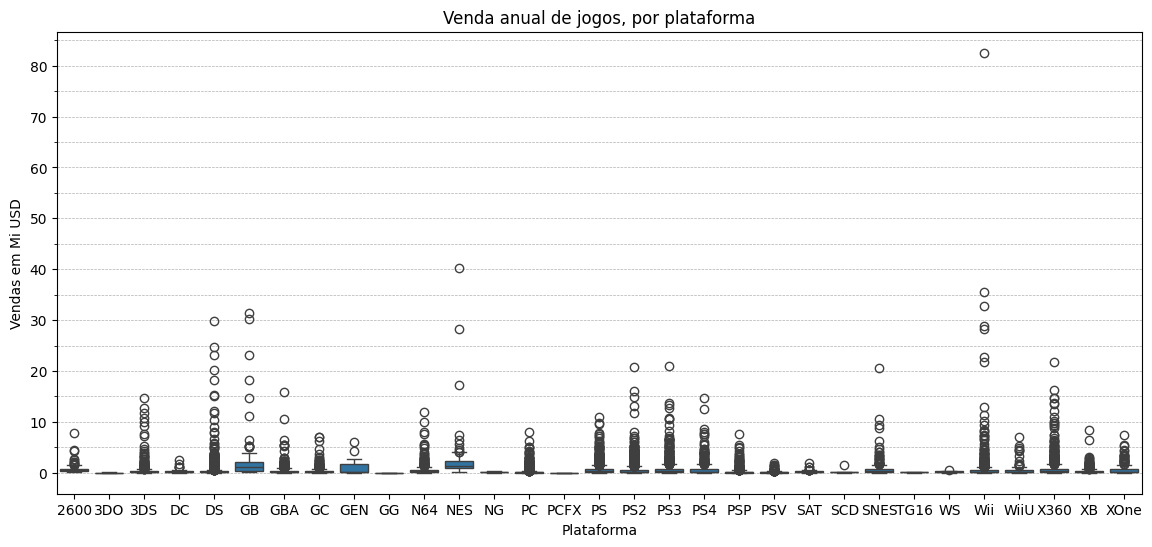

In [22]:
# Filtrando o dataframe original
data_boxplot = data.groupby(['platform','name'])['total_sales'].sum().reset_index()
# data_boxplot

# Criando um boxplot 
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=data_boxplot,
            x='platform',
            y='total_sales'
            );

# Definindo a escala do eixo y como exponencial (logarítmica)
# ax.set_yscale('log')
# plt.xticks(rotation=90) # Rotacionando os labels
# plt.grid(True)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
# Ajustar os ticks do eixo y para mostrar mais linhas
ax.yaxis.set_major_locator(plt.MultipleLocator(10))  # Ajuste '10' para definir a frequência dos ticks
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))   # Ajuste '5' para definir a frequência dos ticks menores

# Adicionando o título e rótulo do eixo x
plt.title('Venda anual de jogos, por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas em Mi USD')

# Exibindo o gráfico
plt.show()

A variabilidade nas quantidades de vendas dos jogos é muito alta. Enquanto alguns venderam menos de 100.000 USD, muitos passaram de 10.000.000 USD.

A visualização do Boxplot nessa configuração fica bastante difícil, já que as caixas/box em si ficaram muito pequenas em relação a todos os dados distribuídos e outliers.

Uma alternativa é alterar a escala do eixo y (vendas) para logarítmica.

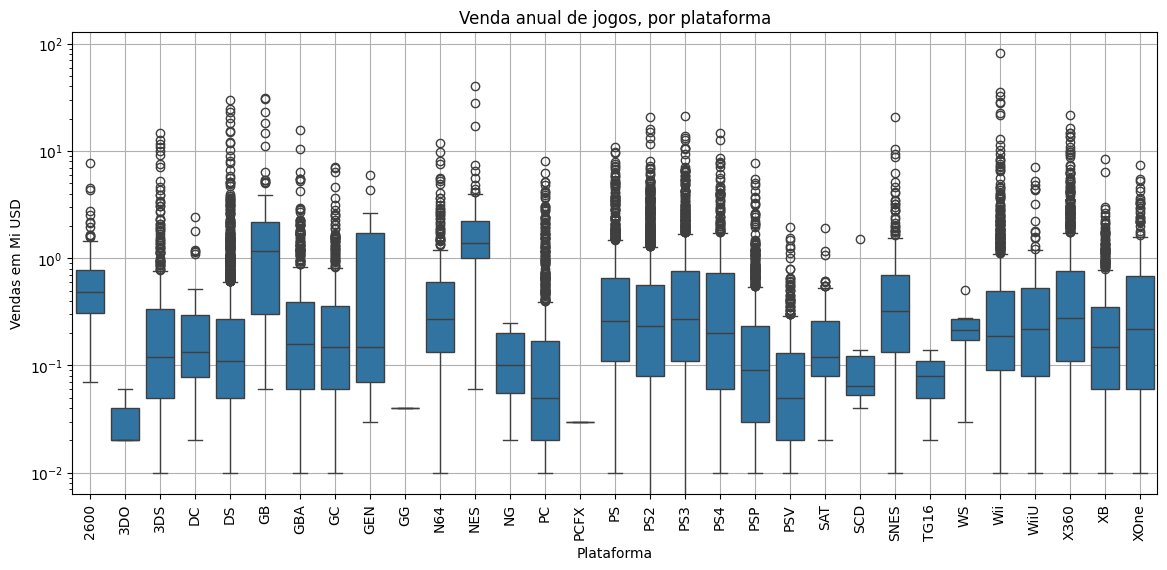

In [23]:
data_boxplot = data.groupby(['platform','name'])['total_sales'].sum().reset_index()
# data_boxplot

# Criando um boxplot 
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=data_boxplot,
            x='platform',
            y='total_sales'
            );

# Definindo a escala do eixo y como exponencial (logarítmica)
ax.set_yscale('log')
plt.xticks(rotation=90) # Rotacionando os labels
plt.grid(True)

# plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
# # Ajustar os ticks do eixo y para mostrar mais linhas
# ax.yaxis.set_major_locator(plt.MultipleLocator(10))  # Ajuste '10' para definir a frequência dos ticks
# ax.yaxis.set_minor_locator(plt.MultipleLocator(5))   # Ajuste '5' para definir a frequência dos ticks menores

# Adicionando o título e rótulo do eixo x
plt.title('Venda anual de jogos, por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas em Mi USD')

# Exibindo o gráfico
plt.show()

Com esta alteração podemos ver mais claramente as caixas/boxplots.

Notamos que a marioria das plataformas tem um tamanho de box entre 10ˆ-1 (que se traduz em 0,1 Mi USD) e 10ˆ0 (1 Mi USD).

Notamos também que existem muitos outliers na parte superior dos boxplots, o que significa que muitos jogos tiveram vendas em quantidades muito grandes, com vários passando da faixa de 10 Mi USD em vendas.

## 3.6. Avaliações vs. Vendas

Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

Vamos facilitar a leitura do gráfico eliminando os pontos extremos (vendas muito grandes) e analisando assim apenas jogos até um limite específico de vendas, já que quase a totalidade dos jogos está concentrada abaixo dos 20 Mi USD em vendas.

Vamos também filtrar por plataforma.

In [24]:
# Primeiramente vamos filtrar os dados, descartando valores NaN nestas análises
data_valid_scores = data.dropna(subset=['critic_score','user_score']).sort_values(by='critic_score', ascending=True)
data_valid_scores['user_score'] = pd.to_numeric(data_valid_scores['user_score'], errors='coerce')
data_valid_scores['critic_score'] = pd.to_numeric(data_valid_scores['critic_score'], errors='coerce')

# Filtrando a plataforma e criando um novo dataframe
plataform_for_analysis = 'PS2'
data_filtered_platform = data_valid_scores[data_valid_scores['platform'] == plataform_for_analysis]


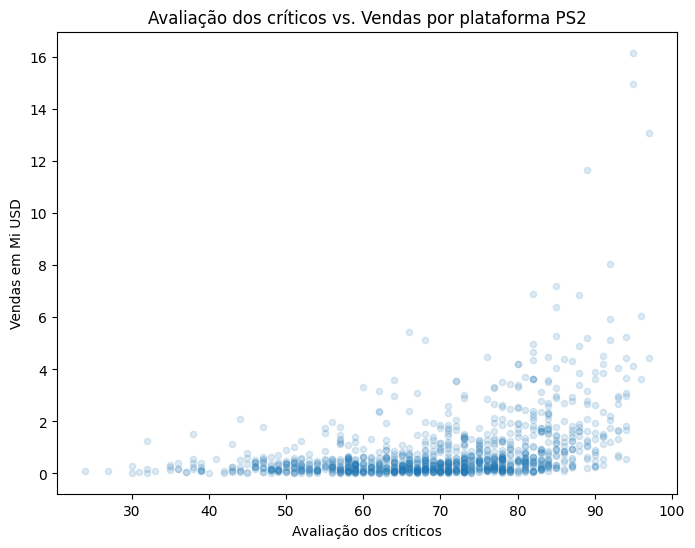

Plataforma avaliada: PS2
A correlação entre a avaliação dos críticos e as vendas totais é de 0.39


In [25]:
# Analisando as avaliações de críticos
# Definindo um limite máximo de vendas
sales_max_limit = 20


# Filtrando o dataframe e plotando o gráfico de dispersão
ax = data_filtered_platform[data_filtered_platform['total_sales'] < sales_max_limit].plot(
    # title='Avaliação dos críticos vs. vendas',
    x='critic_score',
    y='total_sales',
    # xlabel='Avaliação dos críticos',
    # ylabel='Vendas em Mi USD',
    kind='scatter',
    alpha=0.15,
    figsize=[8,6]
);

# Ajustando os rótulos dos eixos
ax.set_xlabel('Avaliação dos críticos');
ax.set_ylabel('Vendas em Mi USD');
ax.set_title(f'Avaliação dos críticos vs. Vendas por plataforma {plataform_for_analysis}');

# Exibindo o gráfico
plt.show();

# Calculando a correlação
print('Plataforma avaliada:', plataform_for_analysis)
print(f'A correlação entre a avaliação dos críticos e as vendas totais é de {round(data_filtered_platform['critic_score'].corr(data_filtered_platform['total_sales']), 2)}')

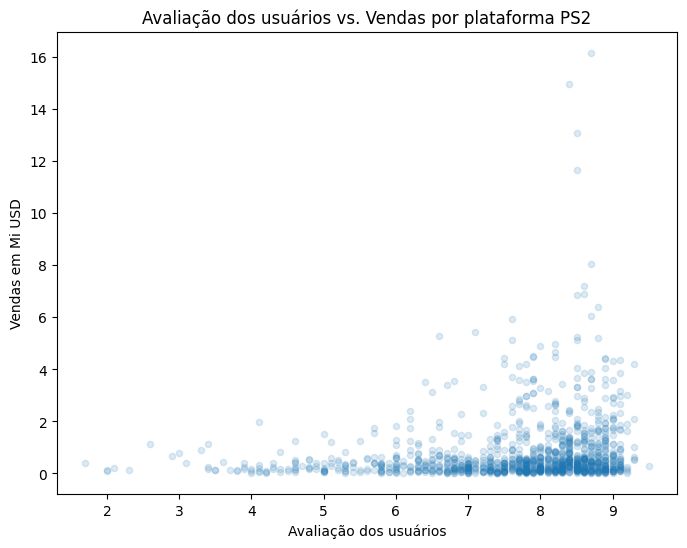

Plataforma avaliada: PS2
A correlação entre a avaliação dos usuários e as vendas totais é de 0.17


In [26]:
# Analisando as avaliações de usuários
# Reordenando os dados
data_filtered_platform = data_filtered_platform.sort_values(by='user_score', ascending=True)

# Definindo um limite de vendas
sales_max_limit = 20

# Filtrando o dataframe e plotando o gráfico de dispersão
ax = data_filtered_platform[data_filtered_platform['total_sales'] < sales_max_limit].plot(
    # title='Avaliação dos críticos vs. vendas',
    x='user_score',
    y='total_sales',
    # xlabel='Avaliação dos críticos',
    # ylabel='Vendas em Mi USD',
    kind='scatter',
    alpha=0.15,
    figsize=[8,6]
);

# Ajustando os rótulos dos eixos
ax.set_xlabel('Avaliação dos usuários')
ax.set_ylabel('Vendas em Mi USD')
ax.set_title(f'Avaliação dos usuários vs. Vendas por plataforma {plataform_for_analysis}');

# Exibindo o gráfico
plt.show();

# Calculando a correlação
print('Plataforma avaliada:', plataform_for_analysis)
print(f'A correlação entre a avaliação dos usuários e as vendas totais é de {round(data_filtered_platform['user_score'].corr(data_filtered_platform['total_sales']), 2)}')

Sem filtrar por plataforma, de forma global podemos constatar as seguintes correlações entre 'vendas totais':
- Correlação com 'avaliação dos críticos' é levemente positiva (0.24)
- Correlação com 'avaliação dos usuários' é quase nula (0.09)

Ao filtrar a plataforma `PS2`, temos que a correlação entre 'vendas totais':
- Correlação com 'avaliação dos críticos' é levemente positiva (0.39)
- Correlação com 'avaliação dos usuários' é levemente positiva (0.37)

## 3.7. Comparando com outras plataformas

Vamos agora avaliar as correlações entre vendas e avaliações em todas as plataformas.

In [27]:
# Criando uma lista com os nomes das plataformas
platforms_list = data_valid_scores['platform'].unique()

# Criando uma lista com as correlações entre 'user_score' e 'total_sales' para cada plataforma
corr_user_sales_list = []
for platform in platforms_list:
    filtered_df = data_valid_scores[data_valid_scores['platform'] == platform]    
    corr_user_sales_list.append(round(filtered_df['user_score'].corr(filtered_df['total_sales']),3))

# Criando uma lista com as correlações entre 'critic_score' e 'total_sales' para cada plataforma
corr_critic_sales_list = []
for platform in platforms_list:
    filtered_df = data_valid_scores[data_valid_scores['platform'] == platform]    
    corr_critic_sales_list.append(round(filtered_df['critic_score'].corr(filtered_df['total_sales']),3))

# Unindo as três listas e criando um dataframe
df_corr = pd.DataFrame({'platform':platforms_list, 'corr_user_sales':corr_user_sales_list, 'corr_critic_sales':corr_critic_sales_list})

In [28]:
print('Maiores correlações entre vendas e avaliações dos usuários:')
print(df_corr.sort_values(by='corr_user_sales', ascending=False))

Maiores correlações entre vendas e avaliações dos usuários:
   platform  corr_user_sales  corr_critic_sales
9      WiiU            0.392              0.351
11       PS            0.301              0.430
7        GC            0.238              0.301
12      3DS            0.232              0.338
13      PSP            0.231              0.297
3        XB            0.179              0.372
8       PS2            0.170              0.389
0       PS3            0.143              0.428
4        DS            0.140              0.231
2       Wii            0.111              0.171
10      GBA            0.110              0.241
5      X360            0.109              0.388
15      PSV            0.038              0.132
14       PC            0.000              0.257
1       PS4           -0.034              0.406
6      XOne           -0.094              0.410
16       DC           -0.303              0.350


In [29]:
print('Maiores correlações entre vendas e avaliações dos críticos:')
print(df_corr.sort_values(by='corr_critic_sales', ascending=False))

Maiores correlações entre vendas e avaliações dos críticos:
   platform  corr_user_sales  corr_critic_sales
11       PS            0.301              0.430
0       PS3            0.143              0.428
6      XOne           -0.094              0.410
1       PS4           -0.034              0.406
8       PS2            0.170              0.389
5      X360            0.109              0.388
3        XB            0.179              0.372
9      WiiU            0.392              0.351
16       DC           -0.303              0.350
12      3DS            0.232              0.338
7        GC            0.238              0.301
13      PSP            0.231              0.297
14       PC            0.000              0.257
10      GBA            0.110              0.241
4        DS            0.140              0.231
2       Wii            0.111              0.171
15      PSV            0.038              0.132


Observando os dados de correlação, vemos que as plataformas que tem maiores correlações positivas:
- entre vendas e avalicões de usuários são WiiU, PS, GC, 3DS e PSP;
- entre vendas e avalicões de críticos são PS, PS3, XOne, PS4 e PS2.

As boas avaliações dos críticos parece ter uma correlação positiva grande, especialmente na família PS, já que 4 gerações estão entre os top 5 de maiores correlações com vendas.

## 3.8. Analisando gêneros versus vendas

Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos?

Você pode generalizar sobre gêneros com vendas altas e baixas?

In [30]:
# Vamos rever os dados de ratings
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [31]:
# Lendo e contando os diferentes genre
print(data['genre'].value_counts(dropna=False))

genre
Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: count, dtype: int64


In [32]:
# Agrupando por genre e somando as vendas totais
data_genre_agg = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print(data_genre_agg)

genre
Action          1735.63
Sports          1326.71
Shooter         1050.02
Role-Playing     931.77
Platform         826.03
Misc             794.41
Racing           725.82
Fighting         443.59
Simulation       388.46
Puzzle           240.54
Adventure        233.35
Strategy         173.25
Name: total_sales, dtype: float64


Os três gêneros mais lucrativos são Action, Sports e Shooter.

In [33]:
# Agrupando e analisando em cada genre, qual foi o máximo e mínimo de vendas
data_genres_extremes = data.groupby('genre').agg(
    total_sales_max=('total_sales', 'max'),
    total_sales_min=('total_sales', 'min')
)

print(data_genres_extremes)

              total_sales_max  total_sales_min
genre                                         
Action                  21.05             0.01
Adventure               11.18             0.01
Fighting                12.84             0.01
Misc                    28.91             0.01
Platform                40.24             0.01
Puzzle                  30.26             0.01
Racing                  35.52             0.00
Role-Playing            31.38             0.01
Shooter                 28.31             0.01
Simulation              24.67             0.01
Sports                  82.54             0.00
Strategy                 5.45             0.01


Não podemos generalizar por rating pois há exceções. Ex:
- genre Strategy é o menos vendido, mas teve um jogo que vendeu 4.83 Mi USD
- genre Action é o mais vendido mas teve um jogo que vendeu apenas 0.01 Mi USD

Em resumo, o fato de um jogo ser do genre Action não significa que será um sucesso enorme de vendas.
Da mesma forma, um jogo do genre Strategy não necessáriamente será um jogo com poucas vendas.

# 4. Perfil por região

Etapa 4. Crie um perfil de usuário para cada região

Para cada região (AN, UE, JP), determine:

As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
Os cinco principais gêneros. Explique a diferença.
As classificações do ESRB afetam as vendas em regiões individuais?

Vamos considerar as vendas de todos os jogos e todos os anos.

## 4.1. Plataformas e market share

Vamos encontrar as 5 principais em cada região

In [34]:
# Cinco principais plataformas (com maiores vendas) na região NA
na_sales = data.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)

# Calculado o market share
na_sales['share'] = na_sales['na_sales'] / na_sales['na_sales'].sum()

# Filtrando as top 5
print(na_sales.head(5))

          na_sales     share
platform                    
X360        599.15  0.137003
PS2         580.09  0.132644
Wii         494.01  0.112961
PS3         391.60  0.089544
DS          381.38  0.087207


In [35]:
# Cinco principais plataformas (com maiores vendas) na região EU
eu_sales = data.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)

# Calculado o market share
eu_sales['share'] = eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()

# Filtrando as top 5
print(eu_sales.head(5))

          eu_sales     share
platform                    
PS2         337.05  0.139525
PS3         328.97  0.136180
X360        269.79  0.111682
Wii         261.48  0.108242
PS          212.39  0.087921


In [36]:
# Cinco principais plataformas (com maiores vendas) na região JP
jp_sales = data.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

# Calculado o market share
jp_sales['share'] = jp_sales['jp_sales'] / jp_sales['jp_sales'].sum()

# Filtrando as top 5
print(jp_sales.head(5))

          jp_sales     share
platform                    
DS          175.02  0.135406
PS          139.78  0.108142
PS2         137.74  0.106564
SNES        116.55  0.090170
3DS         100.64  0.077861


Em cada região, as top 5 plataformas são diferentes.
Os percentuais de marketshare são parecidos entre as top5, independentemente da região, sempre entre 8% e 14%.

## 4.2. Top gêneros por região

In [37]:
# Cinco principais gêneros (com maiores vendas) na região NA
# Filtrando as top 5
print(data.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5))

          na_sales
genre             
Action      873.70
Sports      681.69
Shooter     590.35
Platform    444.44
Misc        401.69


In [38]:
# Cinco principais gêneros (com maiores vendas) na região EU
# Filtrando as top 5
print(data.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5))

         eu_sales
genre            
Action     517.58
Sports     375.60
Shooter    316.96
Racing     235.47
Misc       211.32


In [39]:
# Cinco principais gêneros (com maiores vendas) na região JP
# Filtrando as top 5
print(data.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5))

              jp_sales
genre                 
Role-Playing    353.88
Action          160.15
Sports          135.27
Platform        130.71
Misc            108.04


Notamos que:

- Nas regiões NA e EU, o gênero Action se destaca em primeiro com um volume bastante significativo, enquanto no JP o maior gênero é Role-Playing, e Action (em segundo lugar) tem menos da metade das vendas do primeiro.

- Sports está no top 3 nas 3 regiões

- Shooter está em terceiro lugar tanto em NA como EU, mas fora dos top 5 no JP.

Estas diferenças mostram que há diferença no comportamento e nas preferências dos usuários de cada região.

## 4.3. Classificação ESRB (`rating`)

O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

As classificações do ESRB afetam as vendas em regiões individuais?

In [40]:
# Agrupando as vendas por distintos ratings e por região
data_ratings = data.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

# Ordenando por rating mais vendido nessa regiao
ratings_na = data_ratings['na_sales'].sort_values(ascending=False).reset_index()

# Adicionando coluna com o market share de cada rating nessa região
ratings_na['mkt_share'] = ratings_na['na_sales'] / ratings_na['na_sales'].sum()

print(ratings_na)

  rating  na_sales  mkt_share
0      E   1288.00   0.409654
1      T    751.26   0.238941
2      M    746.95   0.237570
3   E10+    352.56   0.112133
4    K-A      2.56   0.000814
5     EC      1.53   0.000487
6     AO      1.26   0.000401
7     RP      0.00   0.000000


In [41]:
# Ordenando por rating mais vendido nessa regiao
ratings_eu = data_ratings['eu_sales'].sort_values(ascending=False).reset_index()

# Adicionando coluna com o market share de cada rating nessa região
ratings_eu['mkt_share'] = ratings_eu['eu_sales'] / ratings_eu['eu_sales'].sum()

print(ratings_eu)


  rating  eu_sales  mkt_share
0      E    709.20   0.392843
1      M    483.17   0.267640
2      T    423.56   0.234620
3   E10+    188.34   0.104326
4     AO      0.61   0.000338
5    K-A      0.27   0.000150
6     EC      0.11   0.000061
7     RP      0.04   0.000022


In [42]:
# data_ratings

# Ordenando por rating mais vendido nessa regiao
ratings_jp = data_ratings['jp_sales'].sort_values(ascending=False).reset_index()
ratings_jp

# Adicionando coluna com o market share de cada rating nessa região
ratings_jp['mkt_share'] = ratings_jp['jp_sales'] / ratings_jp['jp_sales'].sum()

print(ratings_jp)


  rating  jp_sales  mkt_share
0      E    198.02   0.436004
1      T    150.88   0.332210
2      M     63.61   0.140058
3   E10+     40.20   0.088513
4    K-A      1.46   0.003215
5     AO      0.00   0.000000
6     EC      0.00   0.000000
7     RP      0.00   0.000000


- Vemos o rating E (Everyone) em primeiro nas três regiões, com 39% a 40% do market share;
- Rating T e M alternam entre segundo e terceiro lugar nas vendas nas três regiões, sendo que em NA e EU, cada um deles tem entre 23% e 26% do total.
- Na região JP, no entanto, algo se destaca: o rating T é o segundo maior market share é sua fatia é muito maior (mais que o dobro) do que o terceiro colocado (rating M), ou seja 33% contra 14%.

# 5. Testes de Hipóteses

Testando as seguintes hipóteses:

— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

## 5.1. Teste 1

Hipótese Nula H0: As classificações médias dos usuários das plataformas `Xbox One` e `PC` são as `iguais`.

Hipótese Alternativa H1: As classificações médias dos usuários das plataformas `Xbox One` e `PC` `não são iguais`.

In [43]:
# Definindo a amostra para o teste 1, sample 1
t1_s1 = data[data['platform'] == 'XOne']['user_score'].dropna()

# Definindo a amostra para o teste 1, sample 2
t1_s2 = data[data['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05  # nível crítico de significância estatística
# se o valor-p for menor que alfa, rejeitamos a hipótese nula

results = st.ttest_ind(t1_s1, t1_s2) # executando o teste

print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.1488002807200692e-05
Rejeitamos a hipótese nula


## 5.2. Teste 2

Hipótese Nula H0: As classificações médias de usuários para os gêneros `Action` e `Sports` são `iguais`.

Hipótese Alternativa H1: As classificações médias de usuários para os gêneros `Action` e `Sports` são `diferentes`.

In [44]:
# Definindo a amostra para o teste 2, sample 1
t2_s1 = data[data['genre'] == 'Action']['user_score'].dropna()

# Definindo a amostra para o teste 2, sample 2
t2_s2 = data[data['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05  # nível crítico de significância estatística
# se o valor-p for menor que alfa, rejeitamos a hipótese nula

results = st.ttest_ind(t1_s1, t1_s2) # executando o teste

print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.1488002807200692e-05
Rejeitamos a hipótese nula


Em ambos os testes de hipóteses acima:

1. Usei o teste t de duas amostras independentes (`ttest_ind`) para comparar:
- as médias das classificações dos usuários das plataformas Xbox One e PC;
- as médias das classificações dos usuários para os gêneros Action e Sports;
Essa foi a escolha pois estamos comparando as médias de duas amostras independentes de diferentes categorias (gêneros de jogos) para verificar se há uma diferença significativa entre elas.

2. Usei o nível de significância estatística `alpha = 0.05` pois esse valor é amplamente aceito na pesquisa científica e oferece um compromisso razoável entre sensibilidade e especificidade nas análises estatísticas.

Em ambos os testes, rejeitamos as hipóteses nulas e aceitamos as hipóteses alaternativas, ou seja:
- As classificações médias dos usuários das plataformas `Xbox One` e `PC` `não são iguais`;
- As classificações médias de usuários para os gêneros `Action` e `Sports` são `diferentes`.

# 6. Conclusão Geral

Vimos que de 1980 a 2016 tivemos diferentes ciclos e grandes variações nas quantidades de jogos lançados por ano.

Percebemos que as plataformas tiveram diferentes ciclos de vida, passando por um ápice e um declínio. Em diferentes momentos algumas plataformas foram líderes absolutas e em outros momentos havia maior disputa e menos hegemonia entre as diferentes marcas/plataformas.

Pudemos ver quanto tempo dura o ciclo de vida de diferentes plataformas.

Visualizamos em boxplots a distribuição em diferentes plataformas das quantidade de vendas dos jogos, notando que elas tiveram diferentes variabilidades nas vendas.

Pudemos analisar em gráficos scatter e em tabelas de correlação como as avaliações se correlacionam com as quantidades de vendas. Vimos que as avaliações de usuários e de críticos tem diferentes correlações com as quantidades de vendas.

Notamos que em diferentes regiões as plataformas tem market shares (fatias de mercado) distintas.

Analisamos também, agrupando por gênero, que entre as três regiões tem distintos ranking de gêneros mais vendidos.

No ponto de vista dos diferentes ratings (ESRB), destacando especialmente a região JP, com vendas significativamente maiores de jogos do rating T do que do rating M.

Executamos dois testes de hipóteses e vimos que há diferenças comparando as classificações médias, ao comparar jogos da plataforma XOne com PC e depois comparando os gêneros Action e Sport.